# Credit Card Fraud Detection Using Python

## Name: Darsh Kumar

Data Description

This dataset contains the data realted to transactions. The transactions are then used to detect wheather it was a Valid transaction or a Fraud Transaction based on certain observations and calculations. 

This dataset in total has 284807 rows and 31 columns in which the first 30 columns has the details of the transactions and the last column is the target column which contains binary values 0,1 where 0 represents Valid Transactions and 1 represents Fraud Transactions. This dataset has 284315 Valid Transactions and 492 Fraud Transactions.

In [1]:
# importing the required dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42

###  Data Collection

In [2]:
# loading the dataset as Data Frame using the Pandas Library
df = pd.read_csv('credit_data.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# fetching the total number of data points in the dataset
df.shape

(284807, 31)

In [4]:
# fetching the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# fetching the last five rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# fetching some general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# fetching the general statistical information of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Preprocessing

In [8]:
# checking the dataset for any null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in the dataset

In [9]:
# checking the distribution of the Legit and Fraud Transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

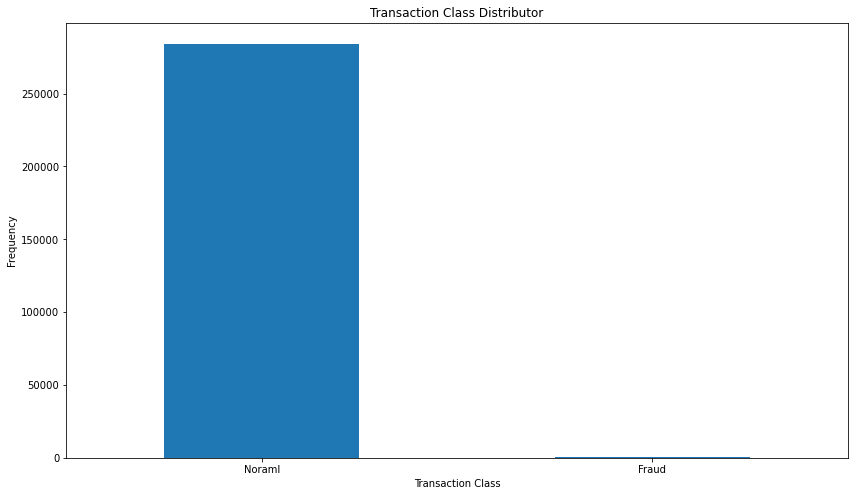

In [10]:
# representing the data in the graphical format
Labels = ['Noraml','Fraud']
y_values = pd.value_counts(df['Class'],sort=True)
y_values.plot(kind='bar',rot=0)
plt.title("Transaction Class Distributor")
plt.xticks(range(2),Labels)
plt.xlabel("Transaction Class")
plt.ylabel("Frequency")

From the Above Visualization we can conclude that this dataset is Imbalanced dataset and needs to balanced before feedind it to a Machine Learning Model

In [11]:
# fetching the fraud and legeit datapoints and storing it in a variable
legeit = df[df['Class']==0]
fraud = df[df['Class']==1]

In [12]:
# printing the shape of legit and fraud transactions
print(legeit.shape,fraud.shape)

(284315, 31) (492, 31)


In [13]:
# Analyzing the total amount of fraud transaction
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Analyzing the total amount of legeit transactions
legeit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

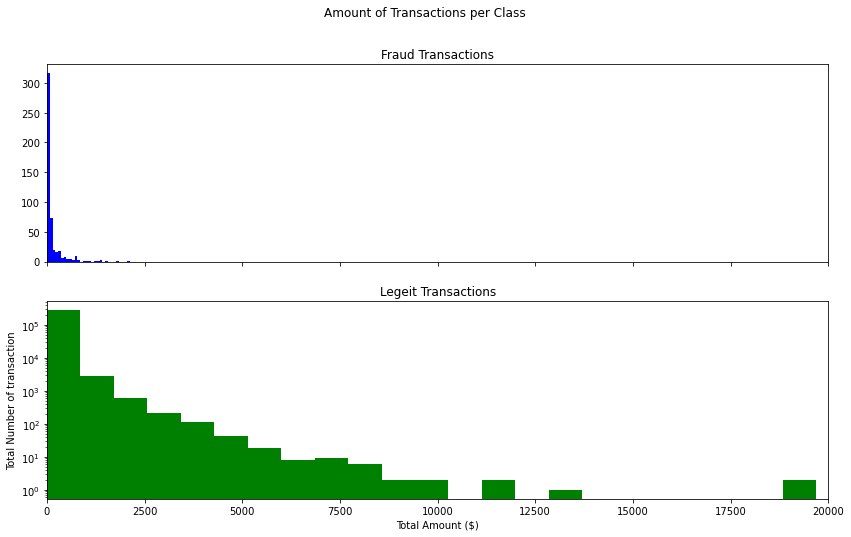

In [15]:
# Plotting the above analysis
a, (axis1,axis2) = plt.subplots(2,1,sharex=True)
a.suptitle("Amount of Transactions per Class")
bins = 30
axis1.hist(fraud.Amount,bins=bins,color='blue')
axis1.set_title("Fraud Transactions")
axis2.hist(legeit.Amount,bins = bins,color='green')
axis2.set_title("Legeit Transactions")
plt.xlabel("Total Amount ($)")
plt.ylabel("Total Number of transaction")
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

From the above graph we can see that the Amount of Fraud Transactions were in small amount. On the other hand Normal Transactions have a variety of range in terms of distribution.

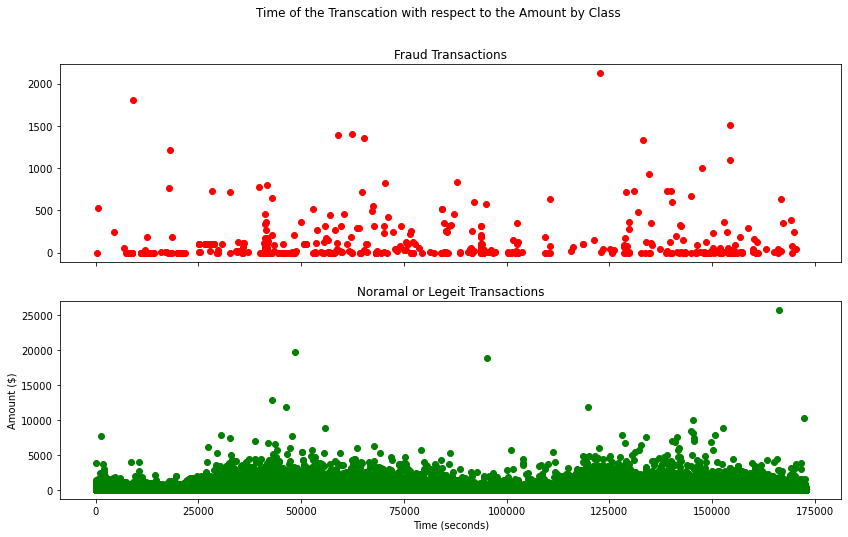

In [16]:
# Analyzing the different transactions for legit and fraud Transaction with respect to the time
b,(axis3,axis4) = plt.subplots(2,1,sharex=True)
b.suptitle("Time of the Transcation with respect to the Amount by Class")
axis3.scatter(fraud.Time,fraud.Amount,color='red')
axis3.set_title("Fraud Transactions")
axis4.scatter(legeit.Time,legeit.Amount,color='green')
axis4.set_title("Noramal or Legeit Transactions")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount ($)")
plt.show()

In [17]:
# Taking Random samples from the data as the dataset is huge it will take more time to preprocess it
df1 = df.sample(frac=0.1,random_state = 1)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1574.0,-0.615776,0.654356,2.618793,0.857434,-0.487340,0.593957,-0.095191,0.426786,0.011607,...,0.010440,0.113631,-0.313035,-0.015388,0.213878,-0.268579,0.117815,0.075734,9.99,0
240932,150813.0,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,...,0.455767,0.388102,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,0.76,0
3701,3169.0,-0.315540,1.054303,1.484711,1.138262,0.394713,-0.168883,0.737923,-0.061284,-0.952381,...,0.005626,0.094740,0.024370,0.091800,-0.463470,-0.457328,0.194541,0.166039,19.60,0
153365,98752.0,-3.580417,4.100916,-2.577720,-1.476718,-0.006201,-2.008418,0.887262,0.304192,2.879710,...,-0.194866,0.571678,-0.001519,0.009117,0.321669,0.034900,0.785417,0.353092,0.92,0


In [18]:
# fetching the total number of datapoints in the sample data
df1.shape

(28481, 31)

In [19]:
# fetching some general statistical information about the sample data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
# Fetching the number of fraud and Valid Transaction in the sample dataset
Valid = df1[df1['Class']==0]
Fraud = df1[df1['Class']==1]
out_fraction = len(Fraud)/float(len(Valid))

In [21]:
# priniting the above values
print("The number of Fraud Transactions are:",len(Fraud))
print("The number of Valid Transactinos are:",len(Valid))
print("The value of Outlier Fraction is:",out_fraction)

The number of Fraud Transactions are: 49
The number of Valid Transactinos are: 28432
The value of Outlier Fraction is: 0.0017234102419808666


<AxesSubplot:>

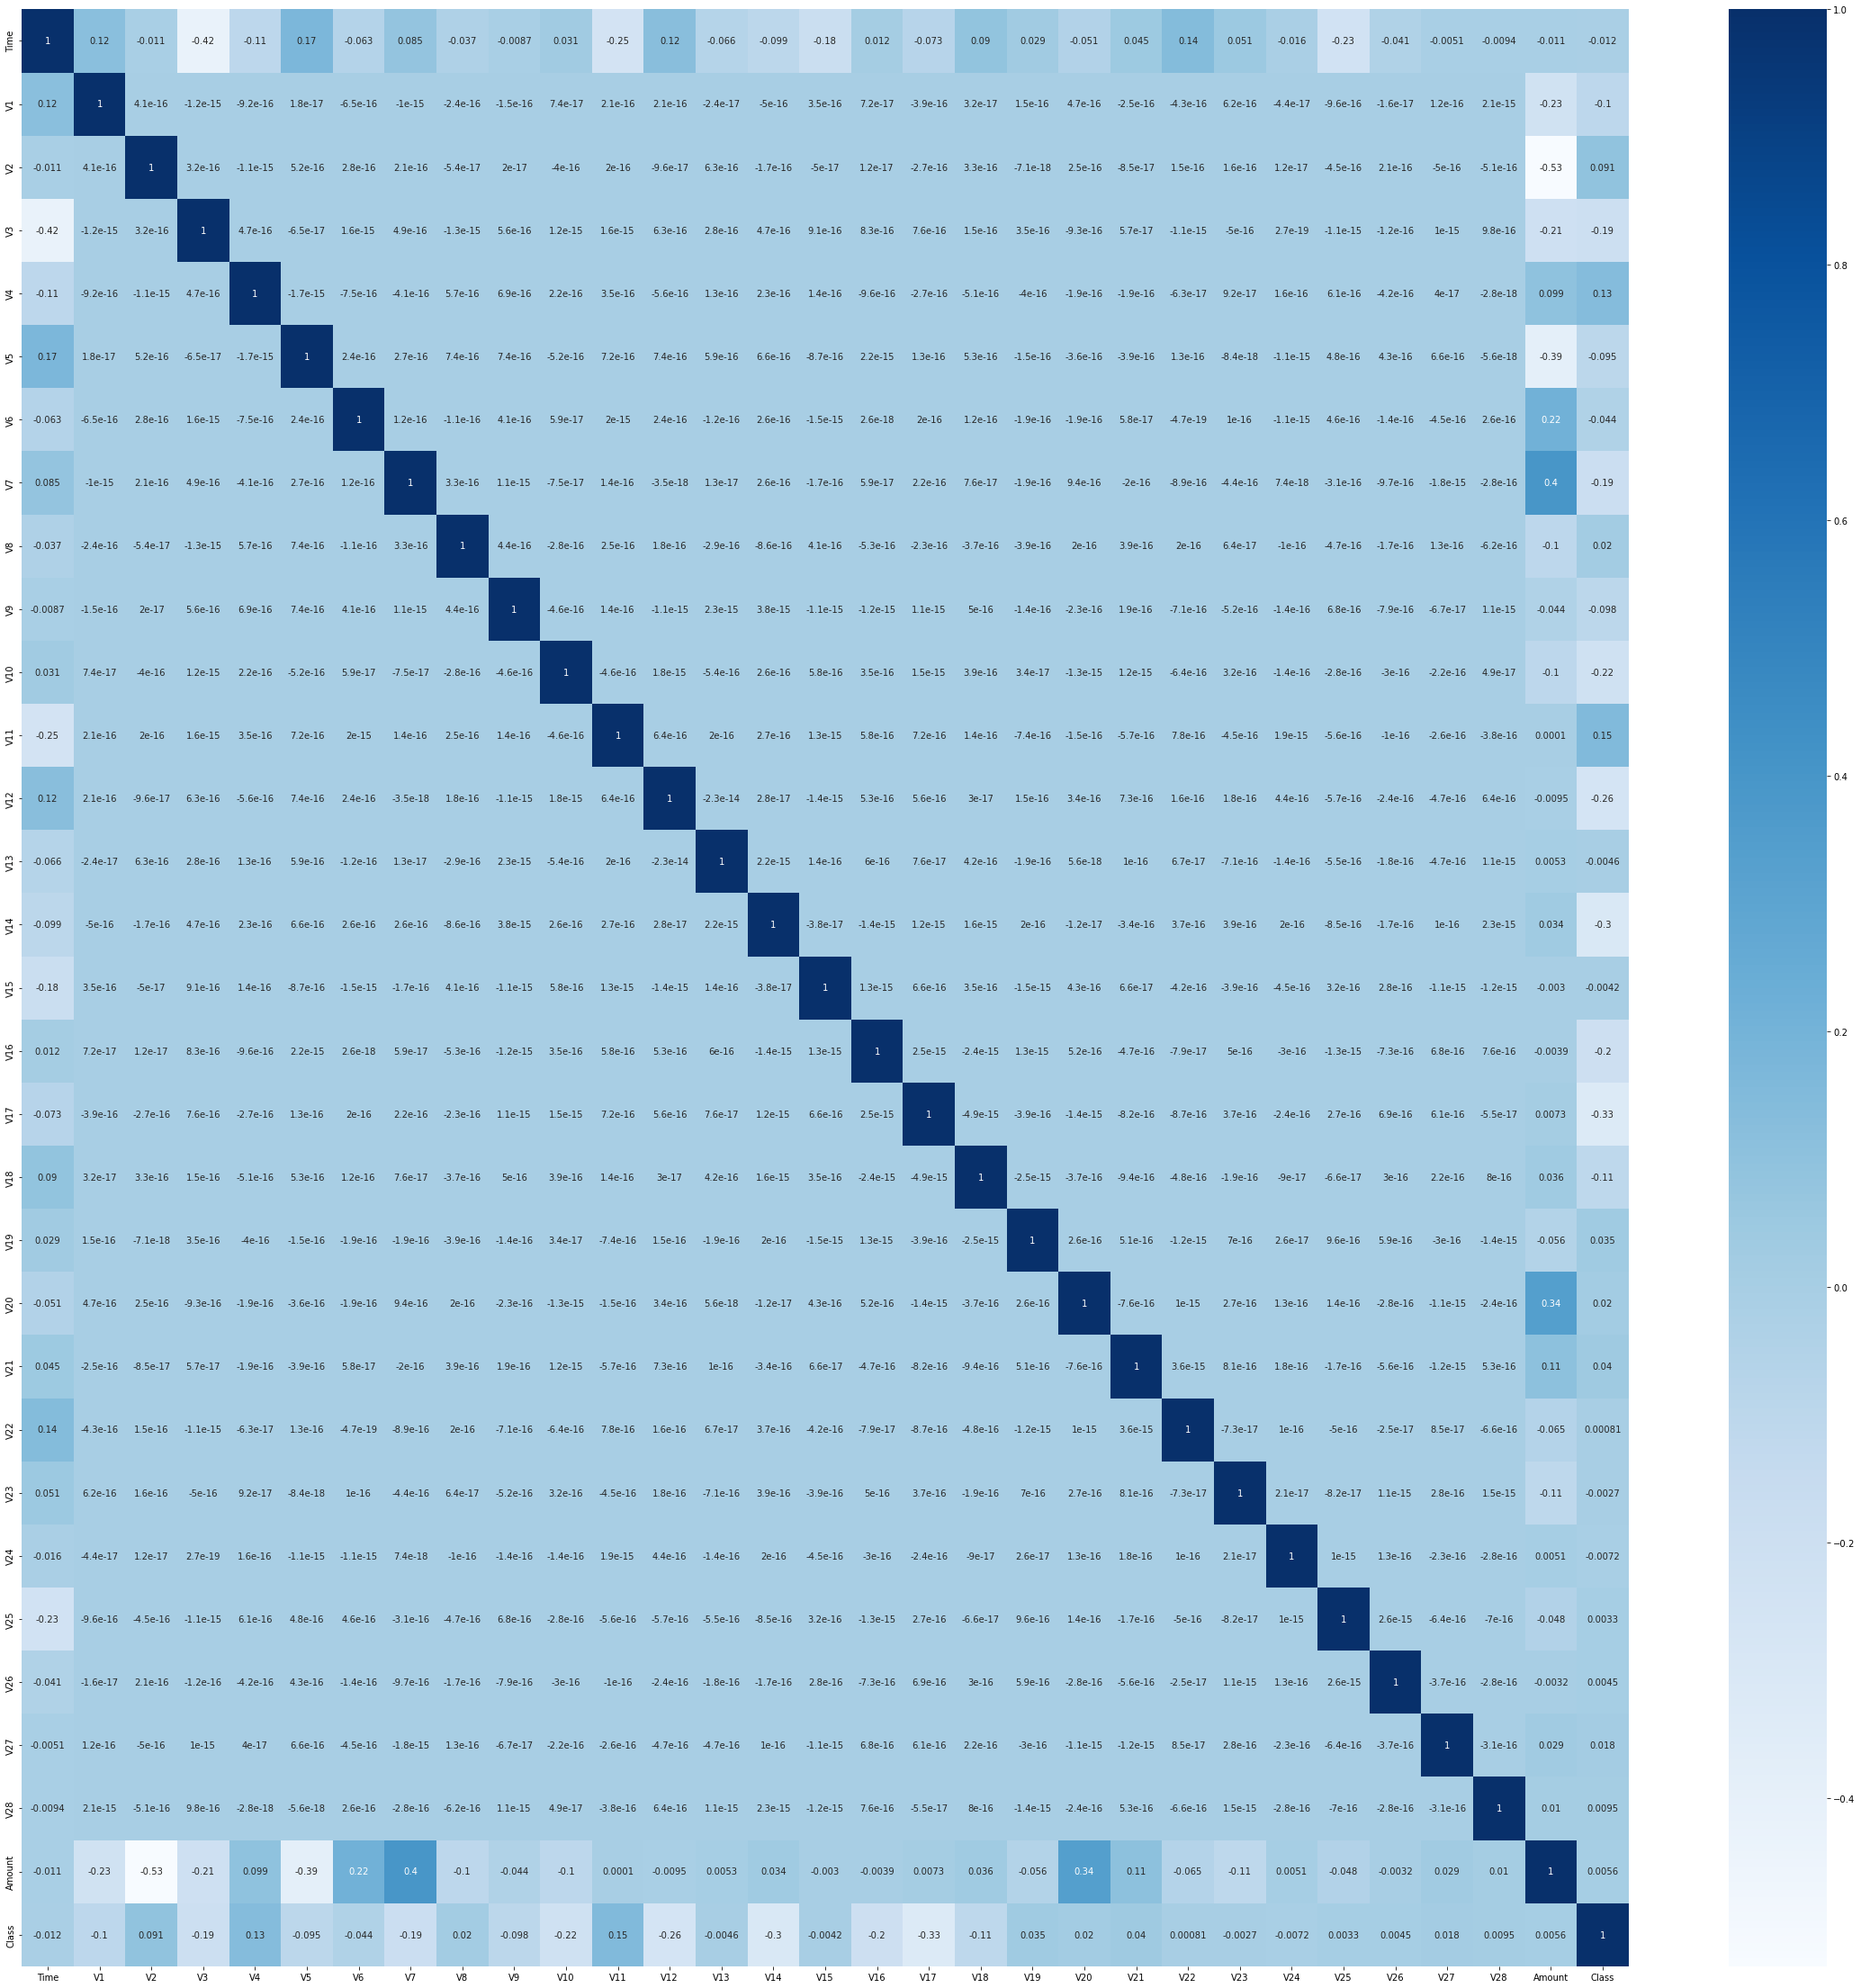

In [22]:
# finding the corrleation amoung all the features in the dataset
cor = df1.corr()
cor_features = cor.index
plt.figure(figsize=(40,40))
sns.heatmap(df[cor_features].corr(),annot=True,cmap="Blues")

In [23]:
# creating dependent and independent features
# converting the sample data to list format
col = df1.columns.tolist()
type(col)

list

In [24]:
# filtering the columns to remove the unwanted data
col = [d for d in col if d not in ['Class']]
target = 'Class'
state = np.random.RandomState(42)
x = df1[col]
y = df1[target]
x_outlier = state.uniform(low = 0, high = 1, size=(x.shape[0],x.shape[1]))

In [25]:
# printing the value of x and y
print(x.shape,y.shape)

(28481, 30) (28481,)


### Model Building

Here in this Project I will use 4 Models to predict the Credit Card Fraud Detection

The names of the model are as under:

    1. Isolation Random Forest
    
    2. Local Outlier Factor (LOF) Algorithm
    
    3. Support Vector Machine (SVM)
    
    4. Logistic Regression

In [26]:
# creating an outlier detection method
classification = {
    "Isolation Random Forest": IsolationForest(n_estimators = 100,max_samples=len(x),contamination=out_fraction,verbose = 0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20,algorithm = 'auto',leaf_size=30,metric='minkowski',p = 2, metric_params = None,contamination = out_fraction),
    "Support Vector Machine": OneClassSVM(kernel = 'rbf',degree = 3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [27]:
# checking the type of classification
type(classification)

dict

### Model Evaluation

In [28]:
# Printing the classification report for Isolation Random Forest, Local Outlier Factor and Support Vector Machine (SVM)
number_of_outliers = len(Fraud)
for i, (classi_name,classi) in enumerate(classification.items()):
    if(classi_name == "Local Outlier Factor"):
        y_pred = classi.fit_predict(x)
        score_pred = classi.negative_outlier_factor_
    elif(classi_name == "Support Vector Machine"):
        classi.fit(x)
        y_pred = classi.predict(x)
    else:
        classi.fit(x)
        score_pred = classi.decision_function(x)
        y_pred = classi.predict(x)
        
    # Reshaping the prediction values
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    number_of_errors = (y_pred != y).sum()
    
    # Printing the values of Classification Metrics
    print("Number of error detected by {} model is: {}".format(classi_name,number_of_errors))
    print("Accuracy Score:",accuracy_score(y,y_pred))
    print("Classification Report:")
    print(classification_report(y,y_pred))

Number of error detected by Isolation Random Forest model is: 75
Accuracy Score: 0.9973666654962958
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Number of error detected by Local Outlier Factor model is: 97
Accuracy Score: 0.9965942207085425
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Number of error detected by Support Vector Machine model is: 8516
Accuracy Score: 0.7009936448860644
Cl

### Creating Logistic Regression Model

In [29]:
# creating the Logistic Regression Model
df2 = df.copy()
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [30]:
# calculation the distribution of Valid and Fraud Transactions
df2['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above calculation we can see that this dataset is highly Imbalanced dataset. Therefore to build an accurate Machine Learning Model we need to make it balanced by using the Undersamplling Method.

In [31]:
# Seperating the Valid and Fraud Transactions
valid = df2[df2['Class']==0]
fraud = df2[df2['Class']==1]

In [32]:
# printing the values of number of datapoints of valid and fraud transaction
print(valid.shape,fraud.shape)

(284315, 31) (492, 31)


In [33]:
# fetching some statistical information about the valid transactions
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [34]:
# fetching some statistical information about the Fraud transactions
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [35]:
# comparing the values of both the transaction
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
# Using Under Sampling method to build the ML Model
valid_sample = valid.sample(n=492)

In [37]:
# concatinating the two dataframes
new_df2 = pd.concat([valid_sample,fraud],axis = 0)

In [38]:
# fetching the first five rows of the new dataset
new_df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7818,10887.0,1.091180,-0.434514,0.434286,0.210750,-0.466927,0.259938,-0.492081,0.153711,2.015391,...,-0.188753,-0.240244,-0.104663,-0.288132,0.296502,1.103699,-0.100651,-0.016268,62.70,0
248310,153884.0,-0.004039,0.558895,0.529733,-0.169635,0.123735,-0.886360,1.156041,-0.283150,-0.140583,...,0.048530,0.240182,0.143943,0.446862,-0.564680,0.060029,-0.143730,-0.152662,84.95,0
239638,150198.0,-4.066867,3.419110,-1.936804,-0.858088,-2.193671,-0.986578,-1.961286,2.815390,0.226213,...,-0.039041,-0.597080,0.348263,-0.067923,0.107931,-0.324528,-0.858631,-0.342365,7.70,0
64654,51248.0,1.095113,-0.255453,1.424584,0.950338,-1.236670,-0.162116,-0.736841,0.217214,1.002057,...,-0.035945,0.081564,0.132908,0.622239,0.084343,0.315894,0.028854,0.028061,11.50,0
214499,139698.0,2.240427,-1.549887,-0.732135,-1.797756,-1.181224,0.086518,-1.425075,0.030040,-1.206890,...,-0.399826,-0.746834,0.301144,-1.098052,-0.503912,-0.443859,0.029947,-0.049881,40.84,0


In [39]:
# fetching the last five rows of the new dataset
new_df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [40]:
# fectching the total number of datapoints in the dataset
new_df2.shape

(984, 31)

In [41]:
# calculating the distribution of Class in new dataset
new_df2['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [42]:
# comparing the values for both types of transaction
new_df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96695.831301,0.111678,-0.035567,-0.050965,-0.132001,-0.020059,-0.073096,0.009546,0.006280,-0.017117,...,-0.050986,-0.052534,-0.012600,0.034900,0.034292,0.007373,0.018140,0.014768,0.003546,77.965650
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [43]:
# splitting the data into featues and target
x = new_df2.drop(columns="Class",axis=1)
y = new_df2['Class']

In [44]:
# printing the value of x
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
7818     10887.0  1.091180 -0.434514  0.434286  0.210750 -0.466927  0.259938   
248310  153884.0 -0.004039  0.558895  0.529733 -0.169635  0.123735 -0.886360   
239638  150198.0 -4.066867  3.419110 -1.936804 -0.858088 -2.193671 -0.986578   
64654    51248.0  1.095113 -0.255453  1.424584  0.950338 -1.236670 -0.162116   
214499  139698.0  2.240427 -1.549887 -0.732135 -1.797756 -1.181224  0.086518   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [45]:
# printing the value of y
print(y)

7818      0
248310    0
239638    0
64654     0
214499    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [46]:
# splitting the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state=2)

In [47]:
# printing the number of datapoint in x training and test data
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [48]:
# printing the number of datapoints in y training and test data
print(y.shape,y_train.shape,y_test.shape)

(984,) (787,) (197,)


### Model Training for Logistic Regression

In [49]:
# buliding the model
regressor = LogisticRegression()

In [50]:
# training the model with training data
regressor.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

In [58]:
# fetching the accuracy score of training data
x_train_pred = regressor.predict(x_train)
train_data_accuracy = accuracy_score(x_train_pred,y_train)
print("The Accuracy Score on the Training Data is:",train_data_accuracy)

The Accuracy Score on the Training Data is: 0.9275730622617535


In [59]:
# fetching the accuracy score of testing data
x_test_pred = regressor.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred,y_test)
print("The Accuracy Score on the testing data is:",test_data_accuracy)

The Accuracy Score on the testing data is: 0.8934010152284264


In [53]:
# fetching the Confusion Matrix
cm = confusion_matrix(y_test,x_test_pred)
print(cm)

[[93  6]
 [15 83]]


Oservation Report of the Above Classification Reports

* The Isolation Random Forest Algorithm has successfully detected 75 cases of Fraud, Local Outlier Factor Model has detected 97 cases of error, Support Vector Machine has successfully detected 8516 cases of Fraud Transaction and Logsitic Regression Model has successfully detected 6+15 Incorrect Predictions.


* If we look at the Accuracy Score of the Three models then Isolation Random Forest Model has performed better than the other two models with an Accuracy score of 99.73% followed by Local Outlier Factor with an Accuracy score of 99.65% and the Support Vector Machine with an Accuracy score of 70.09%.


* If we look at the Accuracy Score of the Logistic Regression Model, then on the training data it is 92.75% and on the testing data it is 89.34%


* When Comparing the Error Precision Control of the three models the Isolation Random Forest Model has performed the best with a score of 24% followed by Local Outlier Factor Model with just 2% and Support Vector Machine with 0%.


* The confusion matrix of Logistic Regreesion shows that the model is giving 93 + 83 Correct Predictions whereas on the other hand the model is giving 6+15 Incorrect Predictions.


* Thus from above observations we can conclude that Isolation Random Forest Model is the best model to detect Faudlent Transactions followed by Local Outlier Factor Model, Logistic Regression Model and Support Vector Machine.

